In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [15]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [8]:
def get_error_plot1(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [9]:
def get_error_plot2(n_trees, test_err1, test_err2, test_err3):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), test_err1, label='test error1')
    plt.plot(list(range(n_trees)), test_err2, label='test error2')
    plt.plot(list(range(n_trees)), test_err3, label='test error3')
    plt.legend(loc='upper right')
    plt.show()

In [29]:
# Число деревьев в ансамбле
n_trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [30]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.3 на тренировочной выборке: 1749.4005096994638
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.3 на тестовой выборке: 4073.3796655281


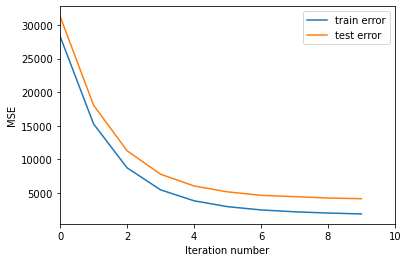

In [31]:
get_error_plot1(n_trees, train_errors, test_errors)

In [51]:
%%time
n_trees = 50
max_depth = 3

trees1, train_errors1, test_errors1 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 21s


In [33]:
evaluate_alg(X_train, X_test, y_train, y_test, trees1, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.3 на тренировочной выборке: 476.6108829547667
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.3 на тестовой выборке: 4135.69348449315


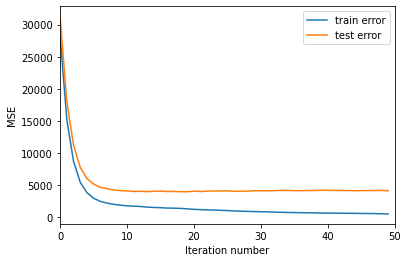

In [34]:
get_error_plot1(n_trees, train_errors, test_errors)

In [35]:
%%time
n_trees = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1.27 s


In [36]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.3 на тренировочной выборке: 2945.337576258613
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.3 на тестовой выборке: 5146.589998480451


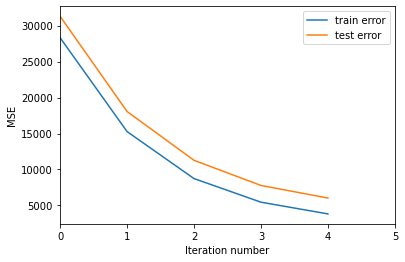

In [37]:
get_error_plot1(n_trees, train_errors, test_errors)

## 2
Рассмотрим варианты с разной глубиной деревьев. За базу возьмем ансамбль из 50 деревьев

In [43]:
%%time
n_trees = 50
max_depth = 2
trees2, train_errors2, test_errors2 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 2min 44s


In [45]:
evaluate_alg(X_train, X_test, y_train, y_test, trees2, eta)

Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 0.3 на тренировочной выборке: 1283.3472334747137
Ошибка алгоритма из 50 деревьев глубиной 2     с шагом 0.3 на тестовой выборке: 3843.4652837471244


In [47]:
%%time
n_trees = 50
max_depth = 1
trees3, train_errors3, test_errors3 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1min 39s


In [48]:
evaluate_alg(X_train, X_test, y_train, y_test, trees3, eta)

Ошибка алгоритма из 50 деревьев глубиной 1     с шагом 0.3 на тренировочной выборке: 2211.490560538814
Ошибка алгоритма из 50 деревьев глубиной 1     с шагом 0.3 на тестовой выборке: 3475.626717854441


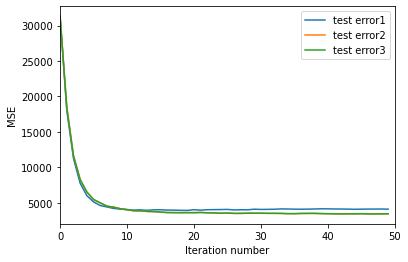

In [52]:
get_error_plot2(n_trees, test_errors1, test_errors2, test_errors3)